UANL  - FCFM

Segundo parcial Introducción al aprendizaje profundo

23 de Abril de 2021

Profesor: MCE. Angel Adrián Domínguez Lozano

Nombre:  

# 1. **(20 puntos)** Describe como podria usarse un Autoencoder para clustering de Imagenes. Investiga la representacion T-sne. 

Nota: 

Descripcion (2 parrafos)

T-sne (2 parrafos)

Opcional (20 puntos extra) Ejemplo en python de T-sne


>**Autoencoder para clustering** 

En los métodos de clustering entre más dimensiones tiene los conjuntos de datos más difícil se vuelve trabajar los, pensar en ellos, trabajar los subespacios se vuelve mas complicado a mayor número de dimensiones e incluso imposible visualizarlos. Los autoencoders se componen de dos partes, un encoder y un decoder, de manera que el encoder busca comprimir la información.

Después de entrenar los pesos de nuestro autoencoders podemos usar la parte del encoder de nuestro modelo para comprimir nuestra imagen obteniendo los pesos que resultan de nuestro encoder, logrando así reducir la dimensionalidad lo que permitirá al algoritmo de clustering utilizado trabajar de mejor manera, facilitando su comprensión e incluso su visualización.

>**T-sne**

T-distributed Stochastic Neighbor Embedding: En ocasiones tenemos datos que cuentan con una alta dimensionalidad, T-sne es una estrategia que nos permite la visualización de datos y la disminución de la dimensionalidad y es apropiado para conjuntos que tienen datos de alta dimensión. 

T-sne busca colocar información multidimensional en un espacio de dimensiones más bajas, es un modelo probabilístico que crea una distribución de probabilidad sobre parejas de muestras ubicadas en el espacio original usándola para llevarlos a un espacio de menor dimensión.

Automatically created module for IPython interactive environment
t-SNE: 6.9 sec


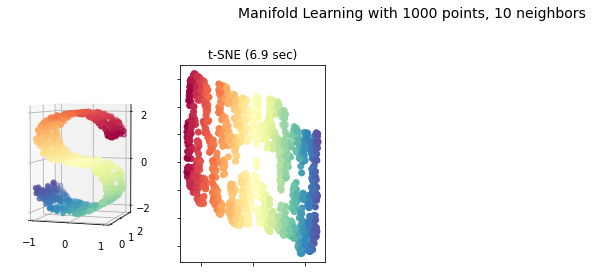

In [1]:
# Ejemplo T-sne

# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

print(__doc__)

from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca', random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

# 2. **(30 puntos)** El conjunto de datos "DatosNoEtiquetados.csv" esta conformado por textos pre-limpiados provenientes de tweets dirigidos a distintas aerolineas. Asigna a cada texto un sentimiento (negative/positive). Describe la metodologia/ideas que estas empleando.

Nota 1: Los 3 alumnos con los accuracy mas altos tendran 20-15-10 puntos extras respectivamente.

Nota 2: Idealmente usar tecnicas no supervisadas o heuristicas. Tambien es valido usar tecnicas supervisadas que no usen redes neuronales.

Nota 3: Enviar un csv con dos columnas
la primera es la misma columna de "DatosNoEtiquetados.csv" y la segunda columna con header "Sentiment" debe contener las etiquetas asignadas (negative/positive). El archivo debe llamarse "ApellidoP2.csv"

> **Clasificación mediante clustering**

Para poder asignarle un sentimiento a cada tweet decidí usar un algoritmo de aprendizaje no supervisado ya que busco categorizarlos en positivos y negativos. Decidí utilizar un algoritmo de clustering ya que me permitirá separar los tweets en dos clusters mediante K-means.

Para comenzar pensé primero en deshacerme de las palabras mas comunes o que no me digan nada. Para esto me apoye del dataset stopwords para deshacerme de las palabras que estén dentro de este dataset, después me deshago de las palabras que solo se repitan una sola vez pues estas pueden causar ruido al momento de hacer la predicción al no presentarse más de una vez.

Una vez descartadas estas palabras las colocare en un diccionario y les daré un índice en un diccionario para así poder usarlas como si fueran coordenadas, después de esto las normalizo para tenerlas en la misma escala y reduciré su numero de dimensiones a 2 dimensiones para un mejor funcionamiento del algoritmo y una mejor visualización de los datos.

Una vez las palabras sean descartadas (las menos necesarias), sustituidas por su índice en el diccionario, normalizadas y transformadas a un vector de dos dimensiones podemos iniciar el proceso de clusterización mediante K-means.


In [2]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import operator

STOPWORDS = set(stopwords.words('english'))

data = pd.read_csv("/content/DatosNoEtiquetados.csv")

# Descarto las palabras que considero inecesarias
def cont_words(art):
  a = 0
  cont = {}
  for documento in art:
    for letra in documento.split(' '):
      a = a + 1
      if letra in cont:
        cont[letra] += 1
      else:
        cont[letra] = 1
  print(a, len(cont))
  contlist = sorted(cont.items(), key=operator.itemgetter(1), reverse=False)
  return contlist

articles = []
for row in data['Text']:
  for word in STOPWORDS:
    token = ' ' + word + ' '
    row = row.replace(token, ' ')
  articles.append(row)

conteo = cont_words(articles)

new_ont = {}
for i in conteo:
  new_ont[i[0]] = i[1]
conteo = new_ont

newArticle = []

for documento in articles:
  for palabra in documento.split(' '):
    if conteo[palabra] == 1:
      token = ' ' + palabra + ' '
      documento = documento.replace(token, ' ')
  newArticle.append(documento)

conteo = cont_words(newArticle)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
5751 2015
4771 1035


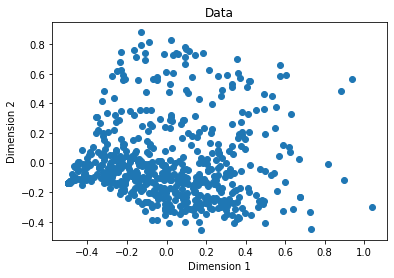

[0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0
 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1
 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1
 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0
 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1
 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1
 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1
 1 1 1 0 0 1 0 0 0 1 1 0 

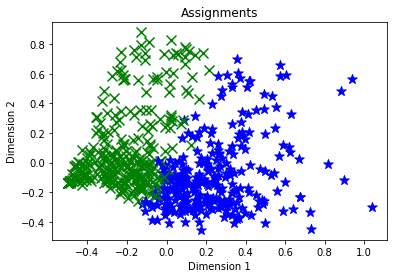

In [3]:
data = pd.DataFrame(newArticle)

# Le asigno un valor a cada palabra con ayuda de Tokenizer
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data[0].values)
X = tokenizer.texts_to_sequences(data[0].values)
X = pad_sequences(X,padding='post')
data = pd.DataFrame(X)

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalizo los datos
scaled_features = MinMaxScaler().fit_transform(data)

# Los transformo a un vector de 2 dimensiones
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)

import matplotlib.pyplot as plt

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

from sklearn.cluster import KMeans

# Creo un modelo con 2 centroides y lo entreno 
model = KMeans(n_clusters=2, init='k-means++', n_init=100, max_iter=1000)
km_clusters = model.fit_predict(data.values)

print(km_clusters)

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green'}
    mrk_dic = {0:'*',1:'x'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

dataVal = pd.read_csv("/content/DatosNoEtiquetados.csv")
# Obtener las labels
map_num2lab = {0:'negative',1:'positive'}
Y_val_lab = [map_num2lab[x] for x in km_clusters]
# Guardar el archivo
dataVal['Sentiment'] = Y_val_lab
dataVal.to_csv("ChavarríaP2.csv")

# 3. **(50 puntos)** El conjunto de datos "DatosEtiquetados.csv" esta conformado por textos pre-limpiados provenientes de tweets dirigidos a distintas aerolineas, además cada uno de los textos tiene asociado un sentimiento (negative/positive). Utiliza  "DatosEtiquetados.csv" para entrenar un modelo con redes neuronales recurrentes para asignar etiquetas al conjunto "DatosNoEtiquetados.csv"


Nota: Los 3 alumnos con los accuracy mas altos tendran 20-15-10 puntos extras respectivamente.

Nota 2: Enviar un csv con dos columnas
la primera es la misma columna de "DatosNoEtiquetados.csv" y la segunda columna con header "Sentiment" debe contener las etiquetas asignadas (negative/positive). El archivo debe llamarse "ApellidoP3.csv" (ver codigo adjunto)


In [4]:
## Usar GPU

In [1]:
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import re

In [2]:
# Lectura
import pandas as pd
data = pd.read_csv("DatosEtiquetados.csv")

In [3]:
# Preproceso
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Text'].values)
X = tokenizer.texts_to_sequences(data['Text'].values)
X = pad_sequences(X,padding='post')
Y = pd.get_dummies(data['Sentiment']).values

In [4]:
# (4000,30) 4000 textos con 30 elementos cada texto
X.shape

(4000, 30)

In [5]:
%tensorflow_version 2.x

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(4000, 30),
  tf.keras.layers.LSTM(30),
  tf.keras.layers.Dense(2,activation='softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [7]:
history = model.fit(X, Y, epochs=30)

Epoch 1/30
125/125 [==============================] - 4s 6ms/step - loss: 0.6267 - accuracy: 0.6208
Epoch 2/30
125/125 [==============================] - 1s 6ms/step - loss: 0.2466 - accuracy: 0.9048
Epoch 3/30
125/125 [==============================] - 1s 5ms/step - loss: 0.1633 - accuracy: 0.9406
Epoch 4/30
125/125 [==============================] - 1s 6ms/step - loss: 0.1224 - accuracy: 0.9629
Epoch 5/30
125/125 [==============================] - 1s 6ms/step - loss: 0.1021 - accuracy: 0.9701
Epoch 6/30
125/125 [==============================] - 1s 6ms/step - loss: 0.0585 - accuracy: 0.9810
Epoch 7/30
125/125 [==============================] - 1s 6ms/step - loss: 0.0637 - accuracy: 0.9819
Epoch 8/30
125/125 [==============================] - 1s 6ms/step - loss: 0.0525 - accuracy: 0.9820
Epoch 9/30
125/125 [==============================] - 1s 5ms/step - loss: 0.0432 - accuracy: 0.9889
Epoch 10/30
125/125 [==============================] - 1s 6ms/step - loss: 0.0422 - accuracy: 0.9901

In [8]:
## CORRER ESTA PARTE UNA VEZ QUE EL MODELO "model" ESTE ENTRENADO
dataVal = pd.read_csv("DatosNoEtiquetados.csv") # Lectura datos no etiquetados
X_val = tokenizer.texts_to_sequences(dataVal['Text']) # Tokenizar
X_val = pad_sequences(X_val,maxlen=30,padding='post') # Padding 30 elementos
Y_val = model.predict(X_val) # model es el modelo que creaste y entrenaste
# Obtener las labels
map_num2lab = {0:'negative',1:'positive'}
Y_val_lab = [map_num2lab[np.argmax(x)] for x in Y_val]
# Guardar el archivo
dataVal['Sentiment'] = Y_val_lab
dataVal.to_csv("ChavarríaP3.csv")

In [ ]:
# x in Y_val es cada [p_0 , p_1]
# x = [9.9999797e-01, 2.0141069e-06]
# x = [4.8973561e-05, 9.9995100e-01]
# ...
# x = [4.8973561e-05, 9.9995100e-01]
# x = [9.9999797e-01, 2.0610623e-06]

# np.argmax(x) es el indice con el elemento mayor

# np.argmax(x) = np.argmax([9.9999797e-01, 2.0141069e-06]) = 0 

# map_num2lab[np.argmax(x)] = map_num2lab[np.argmax([9.9999797e-01, 2.0141069e-06])]
#                           = map_num2lab[0] = 'negative'


Las siguientes lineas de codigo se usaran para revisar el rendimiento del etiquetado presentado.

In [ ]:
dataAns = pd.read_csv("DatosNoEtiquetadosEtiquetas.csv")

In [ ]:
dataAns['Student'] = dataVal['Sentiment']

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(dataAns['Sentiment'],dataAns['Student'])

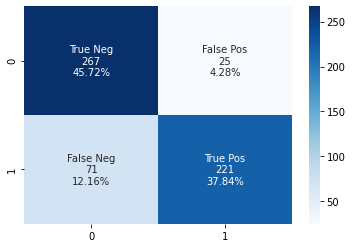

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
sum(sum(cf_matrix))

584

In [ ]:
100* (cf_matrix[0,0] + cf_matrix[1,1] ) / sum(sum(cf_matrix))

83.56164383561644